In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

import astropy as astro
import scipy as scp
import numpy as np
import sys
sys.path.append('/Path/to/shapelets-master/') # uses Griffin Foster's shapelets - https://github.com/griffinfoster/shapelets
import shapelets
from __future__ import division

print "Versions:"
print "python: ",sys.version_info
print "astropy: ",astro.__version__
print "scipy: ",scp.__version__
print "numpy: ",np.__version__

Versions:
python:  sys.version_info(major=2, minor=7, micro=9, releaselevel='final', serial=0)
astropy:  1.2.1
scipy:  0.17.1
numpy:  1.11.1


PSF-Matching Two Point Sources

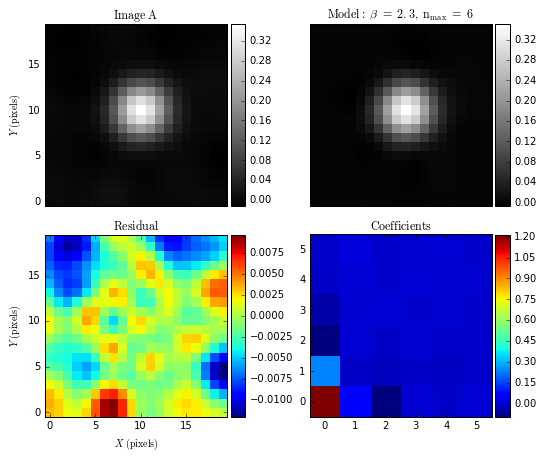

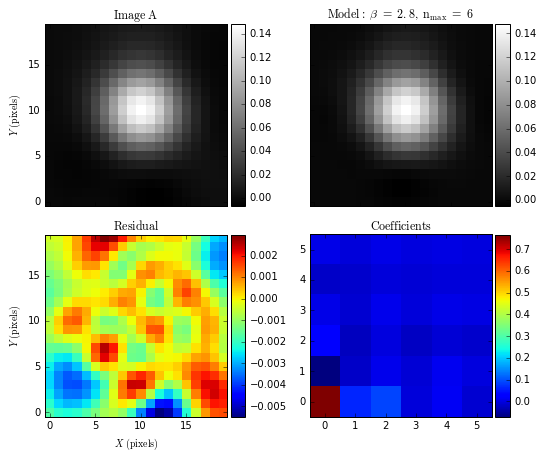

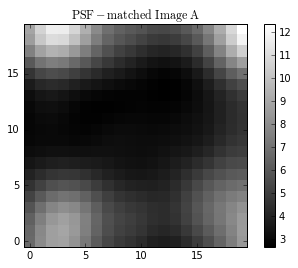

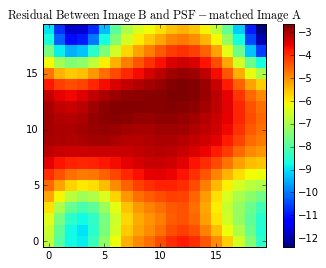

In [11]:
N = 20 # size of square array 
n = 1 # number of point source(s)
f = 5 * (1 + np.random.random(1)) # flux of point source(s)

"""Point Source A - narrow PSF"""

ptsrcA = np.zeros((N, N)) # create array
yA = [10] # set location of point source in Y (left as list in case of multiple point sources)
xA = [10] # now in X
ptsrcA[[i for i in yA], [i for i in xA]] = f # set point source flux 
ptsrcA += np.random.normal(0, 0.05, (N,N)) # add some noise

kernelA = astro.convolution.Gaussian2DKernel(2)
convA = astro.convolution.convolve(ptsrcA, kernelA)

# below we estimate the scale parameter beta, angle phi, 
# nmax, the number of basis functions to use in the decomposition
# and the centroid location
# except for phi, all other parameters above are tuples

betaA, phiA, nmaxA = shapelets.decomp.initParams(convA, mode='moments') # uses second-order image moments - good for gaussian and non-gaussian
xcA = shapelets.img.centroid(convA) # finds centroid coords. 
nmaxA[0] = 6 # from Refregier & Bacon (2003) - for stellar decomp. recommend nmax ~ 6
nmaxA[1] = 6

ryA = np.array(range(0,convA.shape[0]),dtype=float)-xcA[0] # center array around centroid Y coord.
rxA = np.array(range(0,convA.shape[1]),dtype=float)-xcA[1] # center array around centroid X coord.
yyA,xxA = shapelets.shapelet.xy2Grid(ryA,rxA) # creates 2D grid

bvalsA = shapelets.decomp.genBasisMatrix(betaA,nmaxA,phiA,yyA,xxA) # basis function matrix
coeffsA = shapelets.decomp.solveCoeffs(bvalsA,convA) # least squares estimate of coefficients for basis functions
mdlA = shapelets.img.constructModel(bvalsA,coeffsA,convA.shape) # model of image

resA = convA - mdlA # residual
sqCoeffsA = np.reshape(coeffsA,nmaxA) # coefficient matrix
fluxA = shapelets.measure.flux(coeffsA, betaA, nmaxA, mode='hermite') # total flux of object

# plotting
fig, ax = plt.subplots(2, 2)
fig.set_figheight(6)
fig.set_figwidth(7.5)
fig.tight_layout()

imax = ax[0,0].imshow(convA, origin='lower', interpolation='nearest', cmap='gray')
ax[0,0].set_title(r'$\rm{Image \ A}$')
div_im = make_axes_locatable(ax[0,0])
cbimax = div_im.append_axes("right", size="8%", pad=0.05)
cbar_im = plt.colorbar(imax, cax=cbimax, orientation = 'vertical')
ax[0,0].set_ylabel(r'$Y \ (\rm{pixels})$')

mdax = ax[0,1].imshow(mdlA, origin='lower', interpolation='nearest', cmap='gray')
ax[0,1].set_title(r'$\rm{Model:} \ \beta \ = \ ' + str('%.1f' % betaA[0]) + ', \ n_{max} \ = \ ' + str('%.f' % nmaxA[0]) + '$')
div_md = make_axes_locatable(ax[0,1])
cbmdax = div_md.append_axes("right", size="8%", pad=0.05)
cbar_ha = plt.colorbar(mdax, cax=cbmdax, orientation = 'vertical')

resax = ax[1,0].imshow(resA, origin='lower', interpolation='nearest')
ax[1,0].set_title(r'$\rm{Residual}$')
div_res = make_axes_locatable(ax[1,0])
cbresax = div_res.append_axes("right", size="8%", pad=0.05)
cbar_res = plt.colorbar(resax, cax=cbresax, orientation = 'vertical')
ax[1,0].set_xlabel(r'$X \ (\rm{pixels})$')
ax[1,0].set_ylabel(r'$Y \ (\rm{pixels})$')

cfax = ax[1,1].imshow(sqCoeffsA, origin='lower', interpolation='nearest')
ax[1,1].set_title(r'$\rm{Coefficients}$')
div_cf = make_axes_locatable(ax[1,1])
cbcfax = div_cf.append_axes("right", size="8%", pad=0.05)
cbar_cf = plt.colorbar(cfax, cax=cbcfax, orientation = 'vertical')

plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[0,1:]], visible=False)
plt.show()

""" point source B - broader PSF"""

ptsrcB = np.zeros((N, N))
yB = [10]
xB = [10] 
ptsrcB[[i for i in yB], [i for i in xB]] = f
ptsrcB += np.random.normal(0, 0.05, (N,N))

kernelB = Gaussian2DKernel(3)
convB = astro.convolution.convolve(ptsrcB, kernelB)

betaB, phiB, nmaxB = shapelets.decomp.initParams(convB, mode='moments')
xcB = shapelets.img.centroid(convB)
nmaxB[0] = 6
nmaxB[1] = 6

ryB = np.array(range(0,convB.shape[0]),dtype=float)-xcB[0]
rxB = np.array(range(0,convB.shape[1]),dtype=float)-xcB[1]
yyB,xxB = shapelets.shapelet.xy2Grid(ryB,rxB)

bvalsB = shapelets.decomp.genBasisMatrix(betaB,nmaxB,phiB,yyB,xxB)
coeffsB = shapelets.decomp.solveCoeffs(bvalsB,convB)
mdlB = shapelets.img.constructModel(bvalsB,coeffsB,convB.shape)

resB = convB - mdlB # residual
sqCoeffsB = np.reshape(coeffsB,nmaxB) # coefficient matrix
fluxB = shapelets.measure.flux(coeffsB, betaB, nmaxB, mode='hermite') # total flux of object

# plotting
fig, ax = plt.subplots(2, 2)
fig.set_figheight(6)
fig.set_figwidth(7.5)
fig.tight_layout()

imax = ax[0,0].imshow(convB, origin='lower', interpolation='nearest', cmap='gray')
ax[0,0].set_title(r'$\rm{Image \ A}$')
div_im = make_axes_locatable(ax[0,0])
cbimax = div_im.append_axes("right", size="8%", pad=0.05)
cbar_im = plt.colorbar(imax, cax=cbimax, orientation = 'vertical')
ax[0,0].set_ylabel(r'$Y \ (\rm{pixels})$')

mdax = ax[0,1].imshow(mdlB, origin='lower', interpolation='nearest', cmap='gray')
ax[0,1].set_title(r'$\rm{Model:} \ \beta \ = \ ' + str('%.1f' % betaB[0]) + ', \ n_{max} \ = \ ' + str('%.f' % nmaxB[0]) + '$')
div_md = make_axes_locatable(ax[0,1])
cbmdax = div_md.append_axes("right", size="8%", pad=0.05)
cbar_ha = plt.colorbar(mdax, cax=cbmdax, orientation = 'vertical')

resax = ax[1,0].imshow(resB, origin='lower', interpolation='nearest')
ax[1,0].set_title(r'$\rm{Residual}$')
div_res = make_axes_locatable(ax[1,0])
cbresax = div_res.append_axes("right", size="8%", pad=0.05)
cbar_res = plt.colorbar(resax, cax=cbresax, orientation = 'vertical')
ax[1,0].set_xlabel(r'$X \ (\rm{pixels})$')
ax[1,0].set_ylabel(r'$Y \ (\rm{pixels})$')

cfax = ax[1,1].imshow(sqCoeffsB, origin='lower', interpolation='nearest')
ax[1,1].set_title(r'$\rm{Coefficients}$')
div_cf = make_axes_locatable(ax[1,1])
cbcfax = div_cf.append_axes("right", size="8%", pad=0.05)
cbar_cf = plt.colorbar(cfax, cax=cbcfax, orientation = 'vertical')

plt.setp([a.get_xticklabels() for a in ax[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in ax[0,1:]], visible=False)
plt.show()

"""PSF Matching"""
# below we find the ratio of Fourier transforms of the normalized models (effectively the PSFs for each image)
# inverse FT is the PSF matched kernel

coeffs_ratio_fft = np.fft.fftshift(np.fft.fft2(mdlB / fluxB)) / np.fft.fftshift(np.fft.fft2(mdlA / fluxA)) 
coeffs_ratio = np.abs(np.fft.ifft2(np.fft.ifftshift(coeffs_ratio_fft)))

# below is commented out for following reasons:
# One can convolve/deconvolve using the shapelet coefficients for the PSF and a 'PSF matrix'
# For this PSF matrix, input is gamma, alpha, beta, where each is a scale parameter
# and three sets of maximal shapelet basis function values, nh, nf, ng (for convolved image, unconvolved, and PSF, respec.)
# 1. Melchior et al. (2008), Sec. 2 find optimal gamma ** 2 = alpha ** 2 + beta ** 2 and nh = nf + ng
# 2. I tried implementing that below, but the PSF matrix function was acting wonky
# 3. So we use the above FFT - derived kernel

#gam = np.sqrt(min(betaA) ** 2 + min(betaB) ** 2)
#nhmax = [6,6] #list(np.array(nmaxA) + np.array(nmaxB)) # 
#psfmat = shapelets.conv.psfMatrix(coeffs_ratio.reshape, gam, min(betaA), min(betaB), nhmax, nmaxA, nmaxB, mode='hermite')
#gl = np.real((np.dot(psfmat, coeffs_ratio.reshape(36, 1))))
#match_mdlA = shapelets.img.constructModel(bvalsA, gl, convA.shape)

psf_match = scp.ndimage.convolve(convA, coeffs_ratio)

plt.imshow(scp.ndimage.convolve(convA, coeffs_ratio), origin='lower', interpolation='nearest', cmap='gray')
plt.title(r'$\rm{PSF-matched \ Image \ A}$')
plt.colorbar()
plt.show()

plt.imshow(convB - psf_match, origin='lower', interpolation='nearest')
plt.title(r'$\rm{Residual \ Between \ Image \ B \ and \ PSF-matched \ Image \ A}$')
plt.colorbar()
plt.show()